Manim Community v0.19.0

[07/06/25 21:43:47] INFO                                                                   ]8;id=92347;file://C:\Users\prost\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=252307;file://C:\Users\prost\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\manim\scene\scene_file_writer.py#886\886]8;;\
                             File ready at                                                                         
                             'B:\manimations\anthyphairesis\media\images\anthyphairesis\An                         
                             thyphairesis_ManimCE_v0.19.0.png'                                                     
                                                                                                                   

                    INFO     Rendered Anthyphairesis                                                   ]8;id=775703;file://C:\Users\prost\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=775313;file://C:\Users\prost\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\manim\scene\scene.py#255\255]8;;\
                             Played 0 animations                                                                   

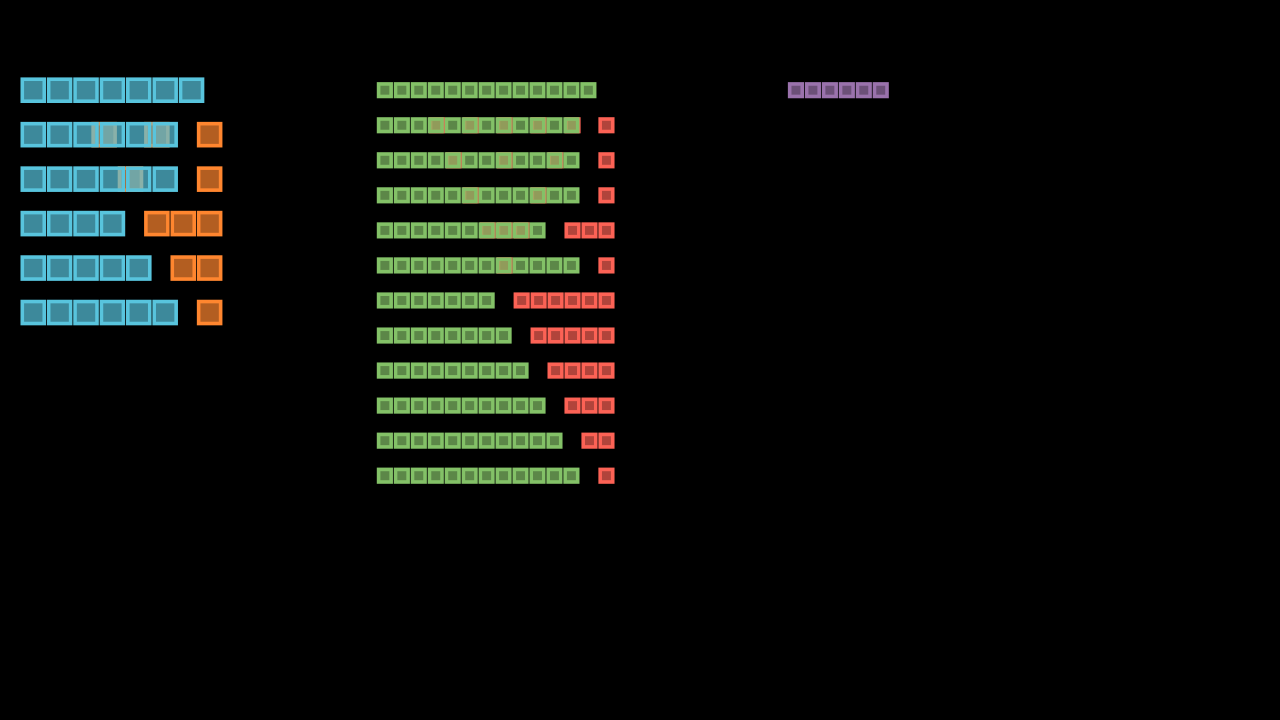

In [10]:
%%manim -qm Anthyphairesis

from manim import *

class Anthyphairesis(Scene):
  def construct(self):
    # ====== INPUTS ======
    a = 7
    b = 13
    steps = self.anthyphairetic_steps(a, b)

    # Frame and layout
    margin = 0.25

    # Leftmost edge of the frame/screen
    left_edge = (-config.frame_width / 2) + (5 * margin)

    # Max allowable width in scene (slightly less than full frame)
    max_width = config.frame_width - 10 * margin
    # max_height = config.frame_height - 10 * margin

    # Maximum width of any column
    column_width = max_width / 3

    shrink_factor = 0.5

    # Determining the size of squares in each column
    ss1 = (column_width / (a + 1)) * shrink_factor
    ss2 = (column_width / (b + 1)) * shrink_factor
    ss3 = min(ss1, ss2)

    # ====== DYNAMIC SIZING ======
    spacing = max(ss1, ss2) * 0.2

    # ====== POSITIONS ======
    top_y = 3
    mid_y = 3
    bot_y = 3

    # ====== COLUMN 1: a ======
    row_a0 = self.make_row(a, ss1, spacing, color=BLUE)
    row_a0.move_to([left_edge, top_y, 0])
    self.add(row_a0)

    self.divvy(row_a0, a, ss1, spacing, BLUE, ORANGE)

    # # ====== COLUMN 2: b ======
    row_b0 = self.make_row(b, ss2, spacing, color=GREEN)
    row_b0.move_to([left_edge + column_width + margin, mid_y, 0])
    self.add(row_b0)

    self.divvy(row_b0, b, ss2, spacing, GREEN, RED)

    # # ====== COLUMN 3: Anthyphairesis Steps ======
    row_c0 = self.make_row(max(a, b), ss3, spacing, color=PURPLE)
    row_c0.move_to([left_edge + 2 * column_width + margin, bot_y, 0])

    row_c0 = self.make_row(max(a, b) - min(a, b), ss3, spacing, color=PURPLE)
    row_c0.move_to([left_edge + 2 * column_width + margin, bot_y, 0])
    
    self.add(row_c0)

    # ====== ADD TO SCENE ======
    # self.add(row_a0, row_b0, step_rows)

  def make_row(self, count, size, spacing, color=WHITE):
    """Creates a horizontal row of `count` squares."""
    row = VGroup(*[
      Square(side_length=size, color=color, fill_opacity=0.7)
      for _ in range(count)
    ])
    row.arrange(RIGHT, buff=spacing)
    return row

  def anthyphairetic_steps(self, a, b):
    """Returns list of quotients from Euclidean algorithm (number of squares per row)."""
    steps = []
    while b != 0:
      q = a // b
      steps.append(q)
      a, b = b, a % b
    return steps

  def divvy(self, row, l, ss, spacing, grpColor, remColor):
    last_grp = row

    for i in range(2, l):
      num_groups = l // i
      rem = l % i

      for n in range(num_groups):
        row_grp = self.make_row(i, ss, spacing, color=grpColor)

        row_grp.next_to(last_grp, DOWN)

        if n == 0:
          row_grp.align_to(row, LEFT)
        else:
          row_grp.next_to(last_grp, RIGHT, buff=spacing)


        last_grp = row_grp

        self.add(row_grp)

        rem_grp = self.make_row(rem, ss, spacing, color=remColor)
        rem_grp.next_to(row_grp, RIGHT)
        self.add(rem_grp)


In [24]:
def ed(n):
    for i in range(1, n):
        q = n // i
        r = n % i
        print(str(n) + " = " + str(i) + " * " + str(q) + " + " + str(r))
    print(str(n) + " = " + str(n) + " * 1 + 0")
    print()

def anth(a,b):   
    while b != 0:
        t = b
        
        print("a = " + str(a))
        print("b = " + str(b))
        
        b = a % b        
        a = t
        
        print()
    return a

def longAnth(arg_a, arg_b):
    a = max(arg_a, arg_b)
    b = min(arg_a, arg_b)
    
    while a != 0:
        a = max(a, b)
        b = min(a, b)
        
        print("a = " + str(a))
        print("b = " + str(b))
        print()
        
        while a > b:
            a = a - b
    

a = 6
b = 16

ed(a)
ed(b)
print(anth(a,b))

6 = 1 * 6 + 0
6 = 2 * 3 + 0
6 = 3 * 2 + 0
6 = 4 * 1 + 2
6 = 5 * 1 + 1
6 = 6 * 1 + 0

16 = 1 * 16 + 0
16 = 2 * 8 + 0
16 = 3 * 5 + 1
16 = 4 * 4 + 0
16 = 5 * 3 + 1
16 = 6 * 2 + 4
16 = 7 * 2 + 2
16 = 8 * 2 + 0
16 = 9 * 1 + 7
16 = 10 * 1 + 6
16 = 11 * 1 + 5
16 = 12 * 1 + 4
16 = 13 * 1 + 3
16 = 14 * 1 + 2
16 = 15 * 1 + 1
16 = 16 * 1 + 0

a = 6
b = 16

a = 6
b = 16

a = 16
b = 6

a = 6
b = 4

a = 4
b = 2

2
